# Introduction to Bayes

## _Josep Fortiana_      2022-02-13

***
###### LaTeX macros
$\def\prob{P}$
$\def\argmax{\operatorname{arg\,max}}$
$\def\argmin{\operatorname{arg\,min}}$
$\def\borel{\operatorname{Borel}}$
$\def\cE{\cal E}$
$\def\cP{\cal P}$
$\def\R{\mathbb{R}}$ 
$\def\N{\mathbb{N}}$
$\def\Z{\mathbb{Z}}$
$\def\Ee{\operatorname{E}}$
$\def\va{\text{v.a.}}$
$\def\var{\operatorname{var}}$
$\def\Var{\operatorname{Var}}$
$\def\cov{\operatorname{cov}}$
$\def\cor{\operatorname{cor}}$
$\def\binomdist{\operatorname{Binom}}$
$\def\berndist{\operatorname{Ber}}$
$\def\betabinomdist{\operatorname{Beta-Binom}}$
$\def\betadist{\operatorname{Beta}}$
$\def\cauchydist{\operatorname{Cauchy}}$
$\def\expdist{\operatorname{Exp}}$
$\def\fdist{\operatorname{F}}$
$\def\gammadist{\operatorname{Gamma}}$
$\def\hyperdist{\operatorname{Hypergeom}}$
$\def\hypergeomdist{\operatorname{Hypergeom}}$
$\DeclareMathOperator{\invgammadist}{IG}$
$\DeclareMathOperator{\multinomialdist}{Multinomial}$
$\DeclareMathOperator{\multinomdist}{Multinom}$
$\def\poissondist{\operatorname{Poisson}}$
$\def\geomdist{\operatorname{Geom}}$
$\def\normaldist{\operatorname{N}}$
$\def\unifdist{\operatorname{Unif}}$
$\def\xbar{\kern1.3pt\overline{\kern-1.3pt x}}$
$\DeclareMathOperator{\indica}{\mathbb{1}}$
$\def\CondTo{\mathbin{|\mskip0.5mu}}$
$\def\eqdef{\stackrel{\text{def}}{\mskip3mu=\mskip3mu}}$
***

# 01- A toy problem: IQ of for a group of children

## Assumptions and context

An intelligence test is administered to a group of children.

Assume the test result $x$ for a given child follows a $\normaldist(\theta,\sigma^2)$ distribution,

$\theta$ is interpreted as the _true IQ_ for this child.

$\sigma^2=100$, a measure of _uncertainty_ in $x$.

This conditional $p(x\CondTo \theta)$ pdf is the _model likelihood_

## Prior pdf (probability density function)

Assume that in the whole population (children in the studied group and age),   

$\theta$ is distributed as a $\normaldist(\mu,\gamma^2)$, 

$\mu=100$, population mean,

$\gamma^2=225$, variability of $\theta$.

This is the _prior pdf_ $p(\theta)$.

## Prior predictive pdf $=$ Marginal $x$ pdf

From both $p(\theta)$ and $p(x\CondTo \theta)$ we obtain the _joint pdf_  $p(x,\theta) = $p(x\CondTo \theta)\cdot p(\theta)$.

Integrating $\theta$ out gives $p(x)=\int p(x,\theta)\cdot d\theta$,  marginal distribution of $x$ $=$ the _prior predictive_ pdf,

the resulting is $\normaldist(\mu,\sigma^2+\gamma^2)=\normaldist(100,325)$.

Meaning: pdf of the average observed IQ when administering the test to randomly selected children.

Two sources of variability (dispersion) are added: 

$\gamma^{2}=225$, population dispersion, and $\sigma^{2}=100$, dispersion of individual measurements.

### Posterior

The posterior pdf of $\theta$, given $x$, $p(\theta\CondTo x)$ is the output of _Bayes rule:_

$$
    p(\theta\CondTo x)=\dfrac{p(x,\theta)}{p(x)}=\dfrac{p(x\CondTo\theta)\cdot p(\theta)}{p(x)}.
$$

After some computations, the result is: the posterior pdf is normal, with mean $\mu_{x}$ and variance $\tau^{2}$:

$$
    \begin{array}{lclcl}
    \mu_{x} &=&\dfrac{\gamma^{2}}{\sigma^{2}+\gamma^{2}}\cdot x+\dfrac{\sigma^{2}}{\sigma^{2}+\gamma^{2}}\cdot \mu,
    &\mskip40mu&\text{A convex combination.}\\[0.2cm]
    \lambda &=&\dfrac{\sigma^{2}}{\sigma^{2}+\gamma^{2}},
    &&\text{Coefficient is the ratio of variabilities.}\\[0.4cm]
    \tau^{2}&=&\dfrac{\sigma^{2}\cdot\gamma^{2}}{\sigma^{2}+\gamma^{2}}
    =\lambda\cdot\gamma^{2}=(1-\lambda)\cdot\sigma^{2}
    =\dfrac{1}{\dfrac{1}{\sigma^{2}}+\dfrac{1}{\gamma^{2}}},
    &&\text{Harmonic mean}.
    \end{array}
$$



With the given numbers:

$$
    \mu_{x}=\frac{225}{100+225}\,x+\frac{100}{100+225}\,100,
$$ 



$$
    \tau^{2}=\frac{100\times 225}{100+225}=\frac{100\times 225}{100+225}=\frac{900}{13}=69.23.
$$

If we observe $x=115$ on a certain child, $\mu_{x}=110.39$.

We infer his true IQ, $\theta$, is distributed as a $\normaldist(110.39,69.23)$.

In [1]:
# Plot the figure 
bayes.normal<-function(x,mu,sigma,gamma){
    lambda<-sigma^2/(sigma^2+gamma^2)
    mux<-lambda*mu+(1-lambda)*x
    tau2<-lambda*gamma^2
    tau<-sqrt(tau2)
    maxsigma<-max(sigma,gamma,tau)
    minmu<-min(mu,x,mux)
    maxmu<-max(mu,x,mux)
    minx<-minmu-5*maxsigma
    maxx<-maxmu+5*maxsigma
    u<-seq(minx,maxx,length=1000)
    prior<-dnorm(u,mean=mu,sd=gamma)
    obs<-dnorm(u,mean=x,sd=sigma)
    post<-dnorm(u,mean=mux,sd=tau)
    maxy<-max(prior,obs,post)
    plot(u,prior,type="l",lwd=3.5,ylim=c(0,maxy*1.1),col="green",
        xlab="",ylab="",main="Prior, observation and posterior",cex.main=1.8)
    lines(u,obs,lwd=3.5,col="blue")
    lines(u,post,lwd=3.5,col="red")
    legend(maxmu+1.8*maxsigma,maxy*1.10,list("Prior","Obs.","Post"),lty="solid",lwd=3.5,col=c("green","blue","red"),cex=1.6)
    }

### Original data

In [2]:
x<-115       # Observed value
sigma<-10    # Standard deviation of mesurements  [LIKELIHOOD]
mu<-100      # Population average    [PRIOR]
gamma<-15    # Population dispersion [PRIOR]

In [3]:
lambda<-sigma^2/(sigma^2+gamma^2)
mux<-lambda*mu+(1-lambda)*x
tau2<-lambda*gamma^2
tau<-sqrt(tau2)
round(lambda,2)
round(mux,2)
round(tau2,2)
round(tau,2)

[1] 0.31

[1] 110.38

[1] 69.23

[1] 8.32

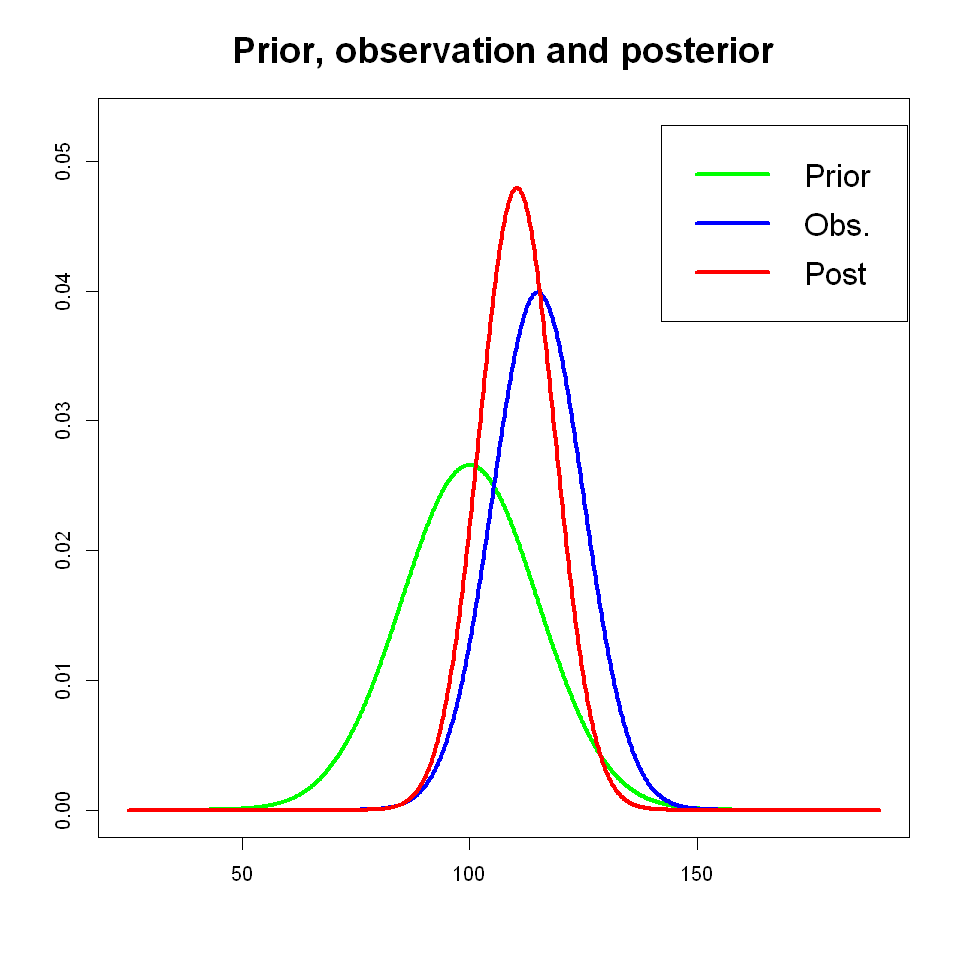

In [4]:
options(repr.plot.width=8,repr.plot.height=8)
bayes.normal(x,mu,sigma,gamma)

### Here with more precise measurements (smaller observed standard deviation)

In [5]:
x<-115       # Observed value
sigma<-6  # Standard deviation of mesurements  [LIKELIHOOD]
mu<-100      # Population average    [PRIOR]
gamma<-15    # Population dispersion [PRIOR]

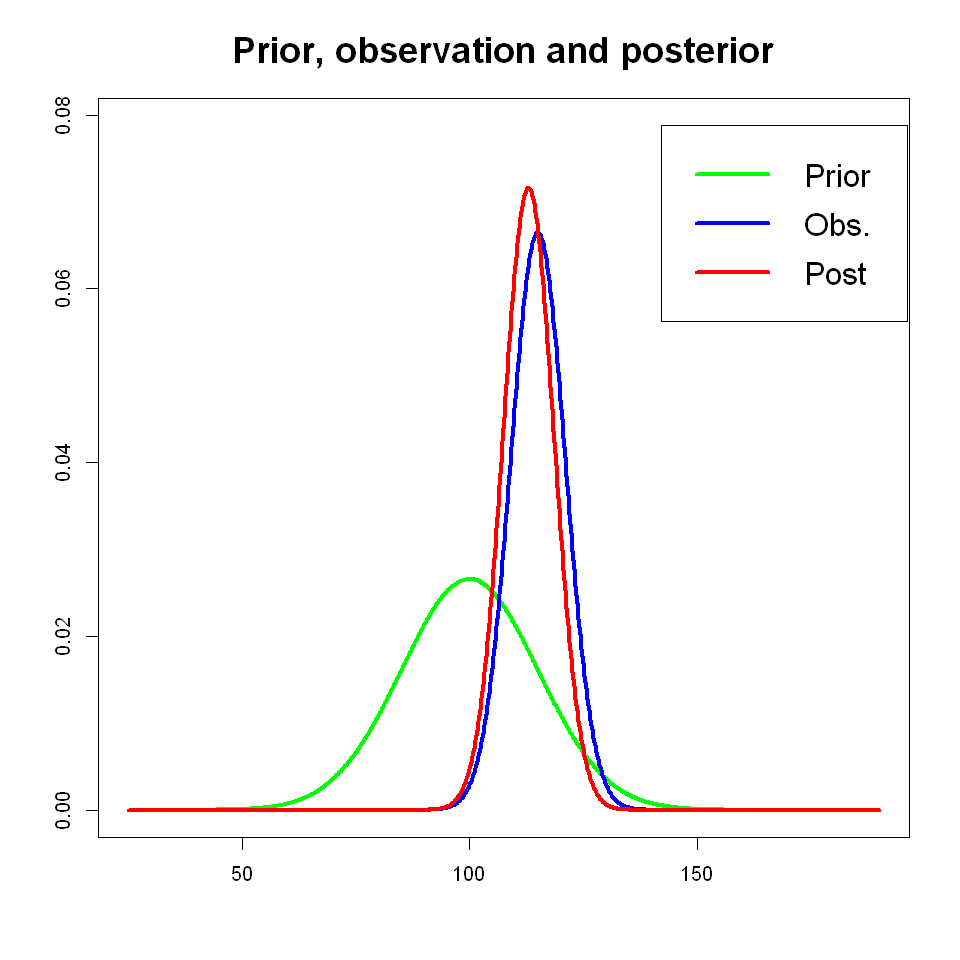

In [6]:
options(repr.plot.width=8,repr.plot.height=8)
bayes.normal(x,mu,sigma,gamma)

### Here prior information is more precise (historical data are more reliable)

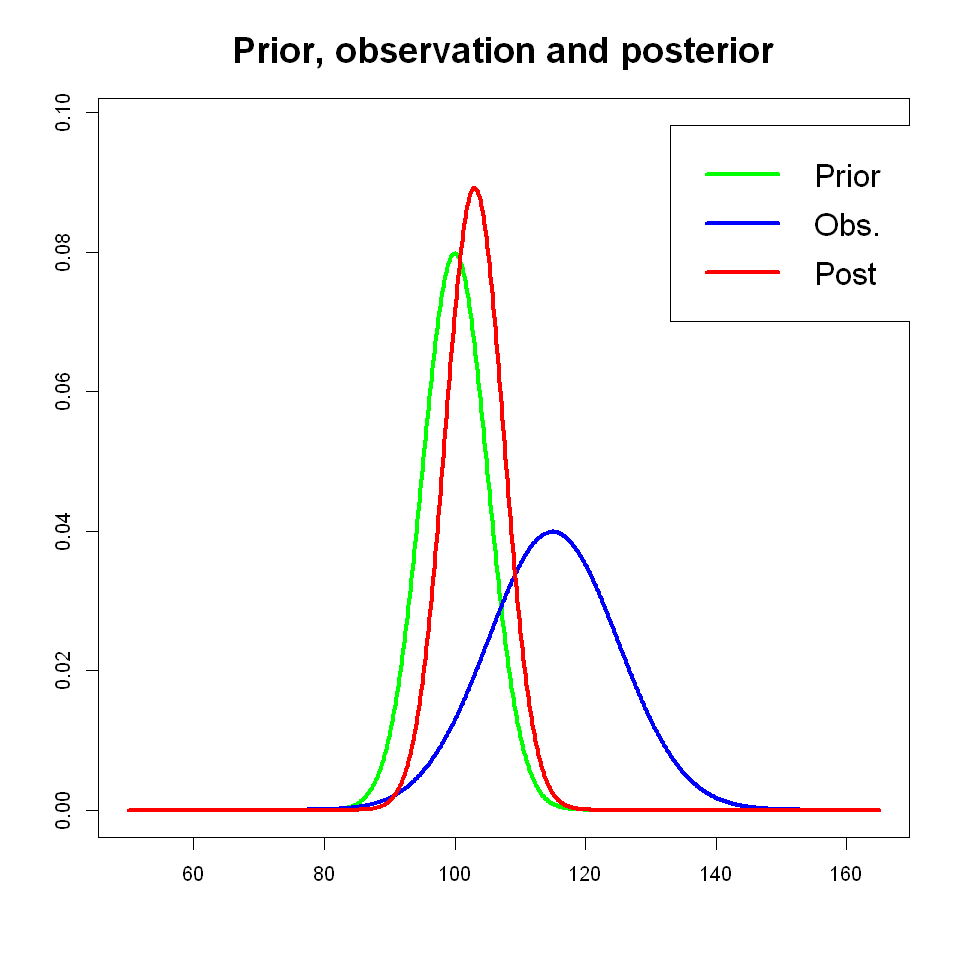

In [7]:
x<-115       # Observed value
sigma<-10    # Standard deviation of mesurements  [LIKELIHOOD]
mu<-100      # Population average    [PRIOR]
gamma<-5     # Population dispersion [PRIOR]
options(repr.plot.width=8,repr.plot.height=8)
bayes.normal(x,mu,sigma,gamma)

# 02 - Bayes billiard

## A one-dimensional billiard

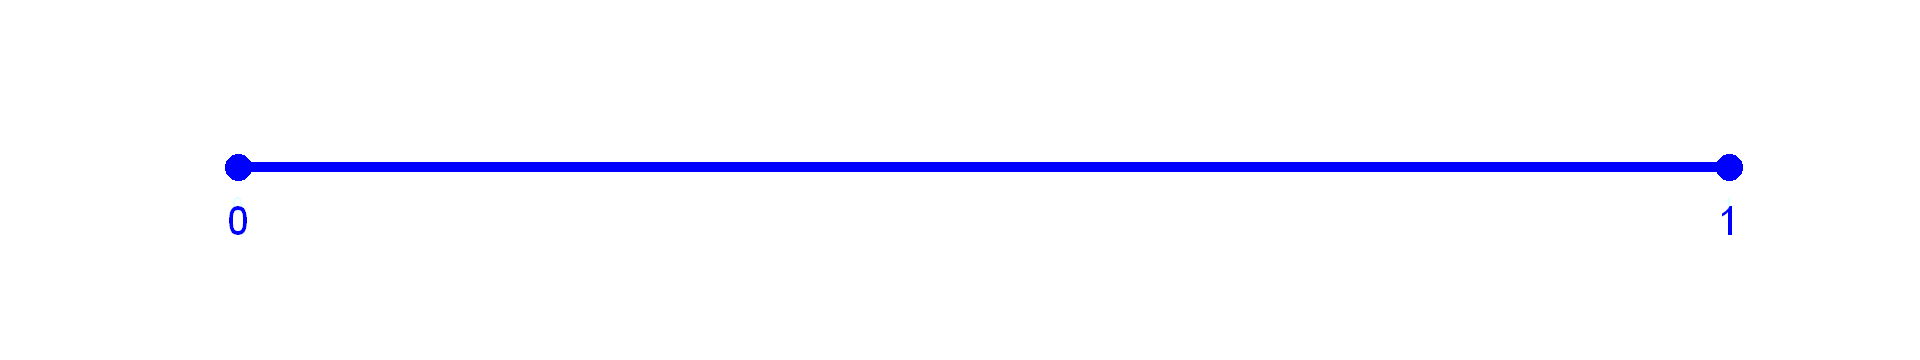

In [8]:
A<-1.1
B<-0.25
old.par<-par(usr=c(-A,A,-B,B))
options(repr.plot.width=16,repr.plot.height=3)
plot.new()
plot.window(xlim=c(-A,A),ylim=c(-B,B),bty="o")
bg<-"LightCyan"
axis(1,pos=0,lwd=1.5,at=c(-1,1),labels=c("0","1"),col.lab="blue",cex.lab=2,tick=FALSE,
     col.axis=bg,cex.axis=1,las=1)
Lx<-c(-1,1)
Ly<-c(0,0)
lines(Lx,Ly,lwd=8,col="blue")
points(Lx,Ly,pch=19,cex=3,col="blue")
text(Lx,c(-0.2,-0.2),c("0","1"),col="blue",cex=2)
par(old.par)

## Cue ball

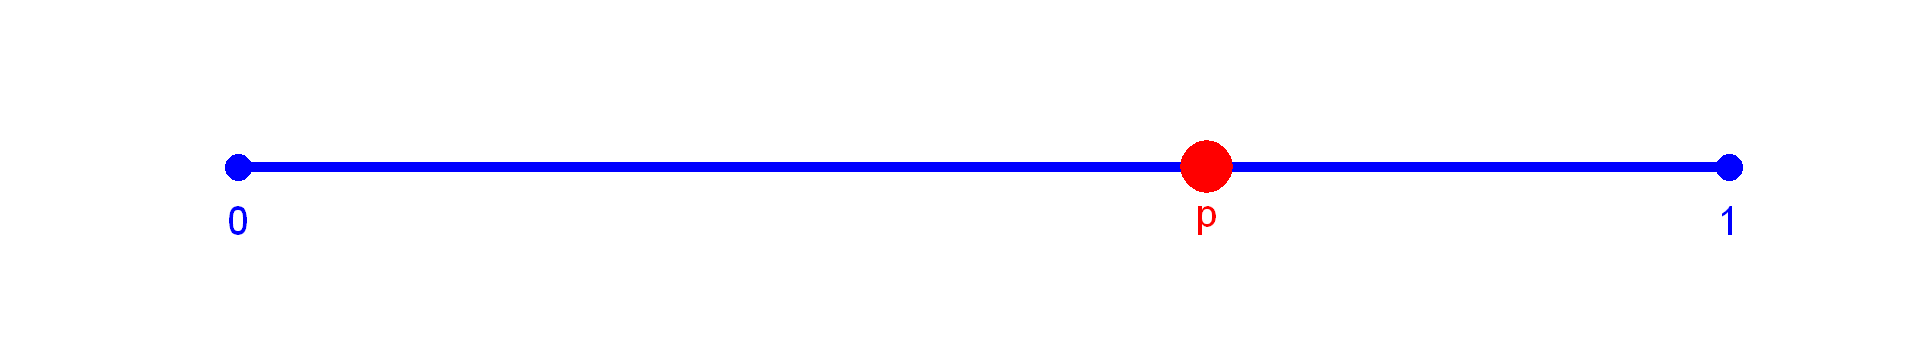

In [9]:
A<-1.1
B<-0.25
old.par<-par(usr=c(-A,A,-B,B))
options(repr.plot.width=16,repr.plot.height=3)
plot.new()
plot.window(xlim=c(-A,A),ylim=c(-B,B),bty="o")
bg<-"white"
axis(1,pos=0,lwd=1.5,at=c(-1,1),labels=c("0","1"),col.lab="blue",cex.lab=2,tick=FALSE,
     col.axis=bg,cex.axis=1,las=1)
Lx<-c(-1,1)
Ly<-c(0,0)
lines(Lx,Ly,lwd=8,col="blue")
points(Lx,Ly,pch=19,cex=3,col="blue")
text(Lx,c(-0.2,-0.2),c("0","1"),col="blue",cex=2)
x.cue<--1+2*0.65
points(x.cue,0,pch=16,col="red",cex=6)
text(x.cue,-0.2,c("p"),col="red",cex=2)
par(old.par)

## Begin the game

In [10]:
# Game rules: first to attain W points wins
W<-6

In [11]:
# Initialization
set.seed(24025)   # some arbitrary seed - for the sake of reproducibility

## Throw balls - See which side of the cue ball they fall

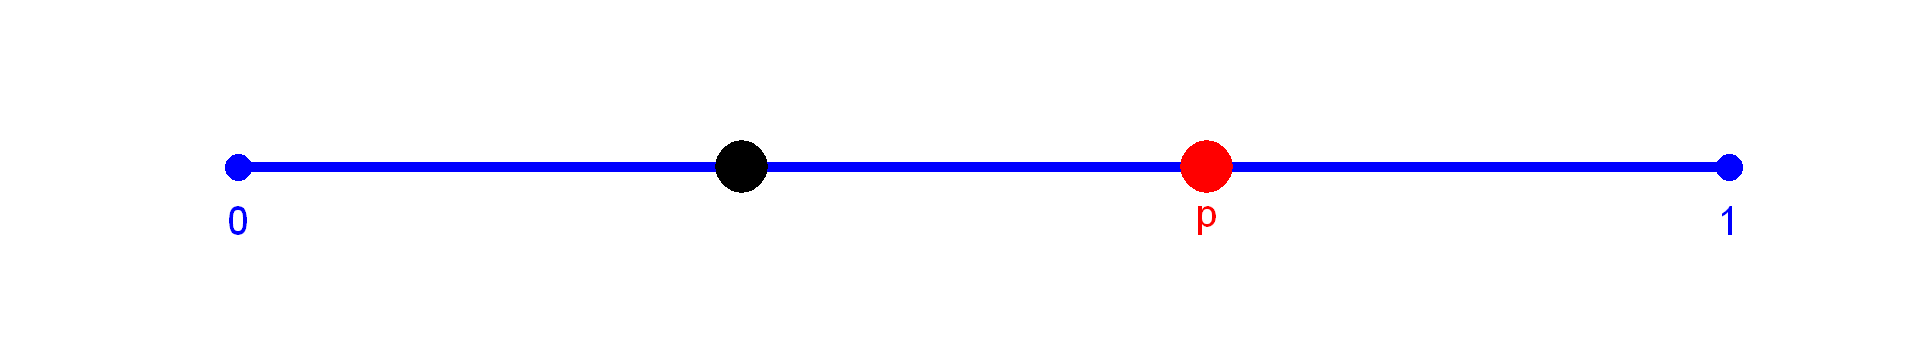

In [12]:
A<-1.1
B<-0.25
old.par<-par(usr=c(-A,A,-B,B))
options(repr.plot.width=16,repr.plot.height=3)
plot.new()
plot.window(xlim=c(-A,A),ylim=c(-B,B),bty="o")
bg<-"white"
axis(1,pos=0,lwd=1.5,at=c(-1,1),labels=c("0","1"),col.lab="blue",cex.lab=2,tick=FALSE,
     col.axis=bg,cex.axis=1,las=1)
Lx<-c(-1,1)
Ly<-c(0,0)
lines(Lx,Ly,lwd=8,col="blue")
points(Lx,Ly,pch=19,cex=3,col="blue")
text(Lx,c(-0.2,-0.2),c("0","1"),col="blue",cex=2)
x.cue<--1+2*0.65
points(x.cue,0,pch=16,col="red",cex=6)
text(x.cue,-0.2,c("p"),col="red",cex=2)
x<--1+2*runif(1)
points(x,0,pch=16,col="black",cex=6)
par(old.par)

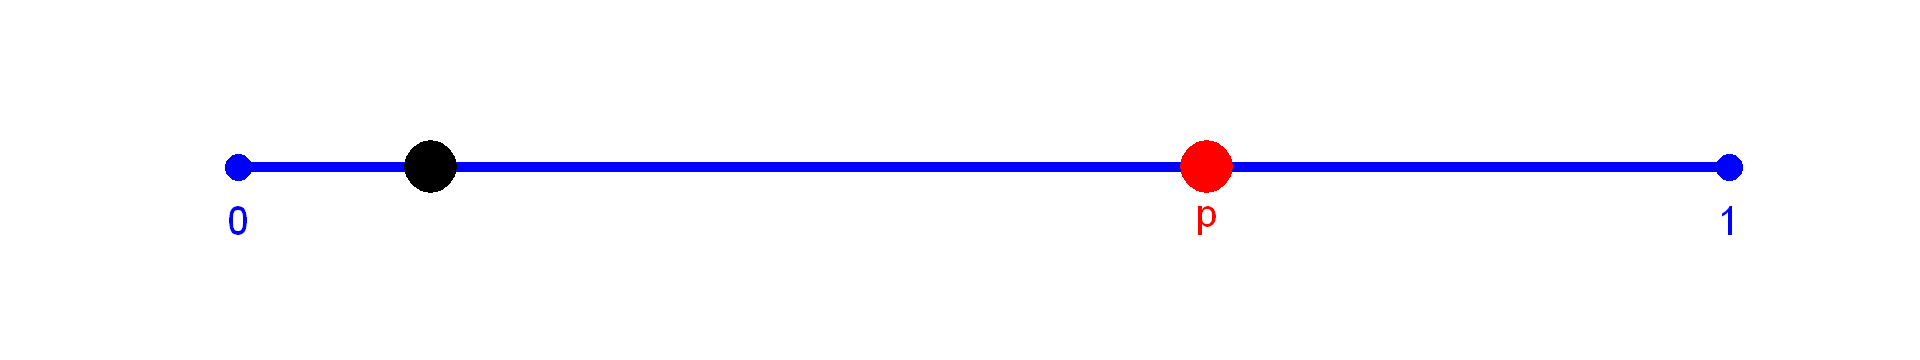

In [13]:
A<-1.1
B<-0.25
old.par<-par(usr=c(-A,A,-B,B))
options(repr.plot.width=16,repr.plot.height=3)
plot.new()
plot.window(xlim=c(-A,A),ylim=c(-B,B),bty="o")
bg<-"white"
axis(1,pos=0,lwd=1.5,at=c(-1,1),labels=c("0","1"),col.lab="blue",cex.lab=2,tick=FALSE,
     col.axis=bg,cex.axis=1,las=1)
Lx<-c(-1,1)
Ly<-c(0,0)
lines(Lx,Ly,lwd=8,col="blue")
points(Lx,Ly,pch=19,cex=3,col="blue")
text(Lx,c(-0.2,-0.2),c("0","1"),col="blue",cex=2)
x.cue<--1+2*0.65
points(x.cue,0,pch=16,col="red",cex=6)
text(x.cue,-0.2,c("p"),col="red",cex=2)
x<--1+2*runif(1)
points(x,0,pch=16,col="black",cex=6)
par(old.par)

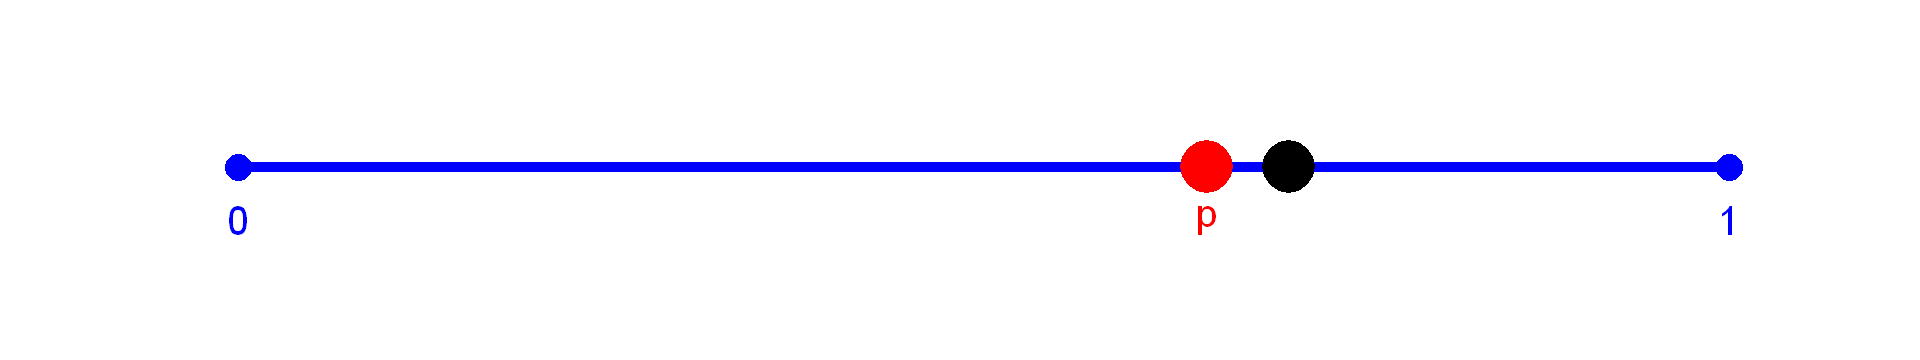

In [14]:
A<-1.1
B<-0.25
old.par<-par(usr=c(-A,A,-B,B))
options(repr.plot.width=16,repr.plot.height=3)
plot.new()
plot.window(xlim=c(-A,A),ylim=c(-B,B),bty="o")
bg<-"white"
axis(1,pos=0,lwd=1.5,at=c(-1,1),labels=c("0","1"),col.lab="blue",cex.lab=2,tick=FALSE,
     col.axis=bg,cex.axis=1,las=1)
Lx<-c(-1,1)
Ly<-c(0,0)
lines(Lx,Ly,lwd=8,col="blue")
points(Lx,Ly,pch=19,cex=3,col="blue")
text(Lx,c(-0.2,-0.2),c("0","1"),col="blue",cex=2)
x.cue<--1+2*0.65
points(x.cue,0,pch=16,col="red",cex=6)
text(x.cue,-0.2,c("p"),col="red",cex=2)
x<--1+2*runif(1)
points(x,0,pch=16,col="black",cex=6)
par(old.par)

# Simulation

## Assume $n=8$ throws done, $a=5$  to the left, $b=3$ to the right of the cue ball

In [15]:
#number of throws so far, number of points for A so far, same for B
n<-8
a<-5
b<-n-a

#### Simulate $N$ games with the same $n=8$

#### Throw cue ball $N$ times, each time with a different $p$, uniformly chosen from the $(0,1)$ interval

#### For each p, an $n$-throws game is played.

### $ap$ (vector) is the register of Alice's points in each game

In [16]:
N<-100000
p<-runif(N)
ap<-rbinom(N,size=n,prob=p)

In [17]:
T<-table(ap)
T

ap
    0     1     2     3     4     5     6     7     8 
11198 11135 11071 11107 11144 11126 11139 11135 10945 

#### Filter the set of games, selecting those for which Alice's score is 'a', the actually observed value
#### (for each of them Bob's score is b = n - a)

#### Keep the values of p for these games
#### Then we study the distribution of this quantity

In [18]:
p.post<-p[ap==a]
n.post<-length(p.post)
str(p.post)

 num [1:11126] 0.727 0.806 0.673 0.348 0.593 ...


#### Now, for just these games we play the remaining $W-b$ rounds, checking whether Bob wins.

#### This happens only if Bob wins all $W-b$ rounds

In [19]:
F.result<-rbinom(n.post,size=W-b,prob=1-p.post)       # number of points for Bob 
B.wins<-(F.result==(W-b))
Freq.Bob.wins<-sum(B.wins)/n.post
round(Freq.Bob.wins,3)

[1] 0.091

This result is close to the theoretically derived $P_{BAYES}(\text{Bob wins})$

In [20]:
# Store as a data.frame, for plotting
p.post.df<-data.frame(p.post)
str(p.post.df)

'data.frame':	11126 obs. of  1 variable:
 $ p.post: num  0.727 0.806 0.673 0.348 0.593 ...


In [21]:
require(MASS,quietly=TRUE)
require(ggplot2,quietly=TRUE)

List of 7
 $ x        : num [1:512] 0.033 0.035 0.0369 0.0389 0.0409 ...
 $ y        : num [1:512] 2.09e-05 2.76e-05 3.62e-05 4.75e-05 6.17e-05 ...
 $ bw       : num 0.0207
 $ n        : int 11126
 $ call     : language density.default(x = p.post)
 $ data.name: chr "p.post"
 $ has.na   : logi FALSE
 - attr(*, "class")= chr "density"


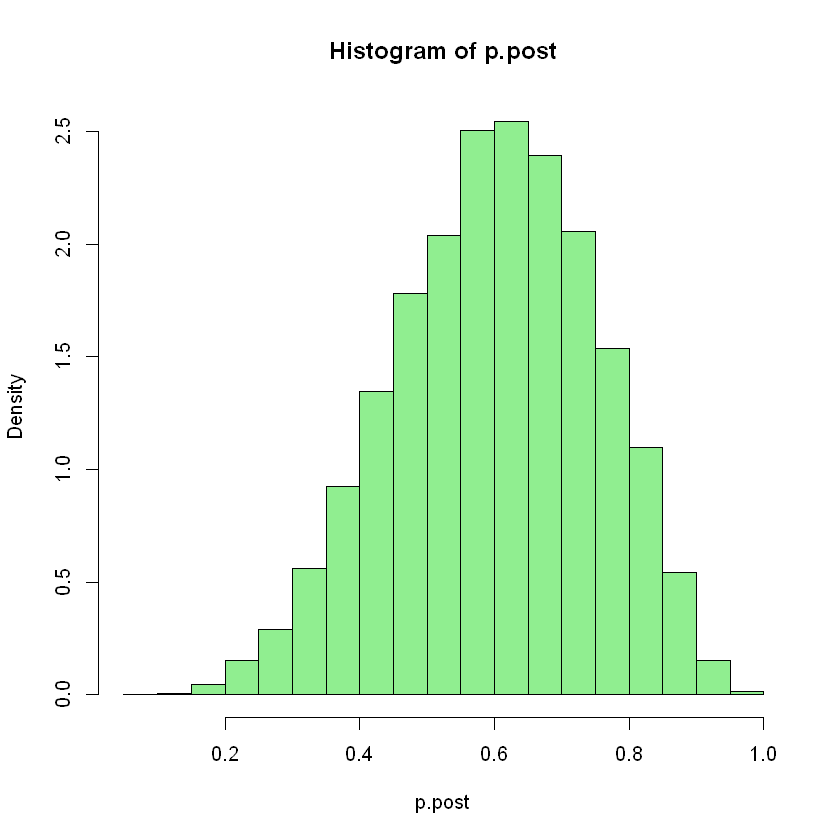

In [22]:
options(repr.plot.width=7,repr.plot.height=7)
h<-hist(p.post,freq=FALSE,col="LightGreen")
p.post.density<-density(p.post)
str(p.post.density)

In [23]:
p.post.MAP<-p.post.density$x[which.max(p.post.density$y)]
round(p.post.MAP,3)
round(a/n,3)
fractions(p.post.MAP)

[1] 0.614

[1] 0.625

[1] 2177/3545

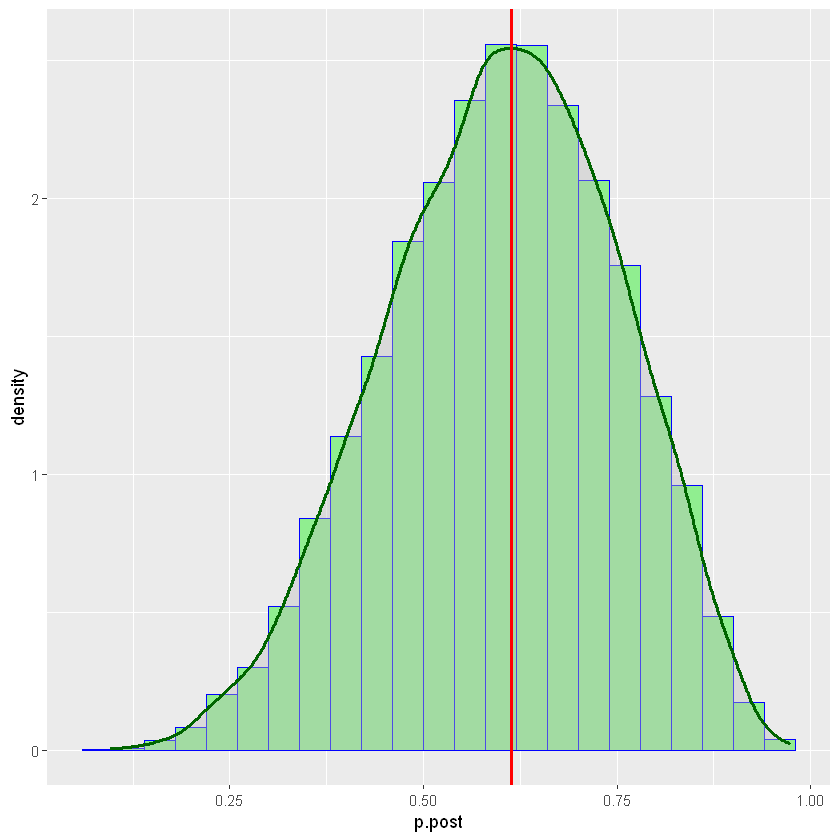

In [24]:
options(repr.plot.width=7,repr.plot.height=7)
plot.01<-ggplot(p.post.df, aes(x=p.post))+geom_histogram(aes(y=after_stat(density)),binwidth=0.04,color="blue",fill="LightGreen")+
    geom_density(alpha=.4, color="DarkGreen",fill="gray",linewidth=1.1)

plot.01+geom_vline(aes(xintercept=p.post.MAP),color="red", linewidth=1.1)